In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

In [4]:
ideal = pd.read_csv("/content/Hackathon_Ideal_Data.csv")

In [5]:
mapping = pd.read_csv("/content/Hackathon_Mapping_File.csv")

In [6]:
validation = pd.read_csv("/content/Hackathon_Validation_Data.csv")

In [7]:
working = pd.read_csv("/content/Hackathon_Working_Data.csv")

In [8]:
ideal.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [9]:
mapping.head()

,File Name,Column Name,Column Description
0,Hackathon_Ideal_Data,MONTH,"Month ID (M1, M2, M3)"
1,NaN,STORECODE,"STORE CODE (P1, P2, …, P10)"
2,NaN,QTY,Sales Unit
3,NaN,VALUE,Sales Value
4,NaN,GRP,Category


In [10]:
validation.head()

,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS


In [11]:
working.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [12]:
ideal.shape

(14260, 10)

In [13]:
mapping.shape

(24, 3)

In [14]:
validation.shape

(2430, 4)

In [15]:
working.shape

(26985, 14)

In [16]:
ideal.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [17]:
working.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [18]:
ideal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


In [19]:
working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [20]:
# Data Preprocessing and Feature Engineering
imputer = SimpleImputer(strategy="mean")
ideal_filled = imputer.fit_transform(ideal.select_dtypes(include=['int','float']))
ideal_filled = pd.DataFrame(ideal_filled,columns=ideal.select_dtypes(include=['int','float']).columns)

In [21]:
scaler = StandardScaler()
working_scaled = scaler.fit_transform(working.select_dtypes(include=['int','float']))
working_scaled = pd.DataFrame(working_scaled,columns=working.select_dtypes(include=['int','float']).columns)

In [23]:
encoder = OneHotEncoder()
ideal_encoded = pd.get_dummies(ideal.select_dtypes(include=['object']))
ideal_preprocessed = pd.concat([ideal_filled, ideal_encoded],axis=1)
print("Ideal data after preprocessing:")
ideal_preprocessed.head()

Ideal data after preprocessing:


,QTY,VALUE,MONTH_M1,MONTH_M2,MONTH_M3,STORECODE_P1,STORECODE_P10,STORECODE_P2,STORECODE_P3,STORECODE_P4,...,BRD_ZANDU,BRD_ZANDU GEL,BRD_ZANDU ULTRA POWER,BRD_ZATPAT,BRD_ZED BLACK,BRD_ZED BLACK DEEP MOGRA,BRD_ZED BLACK DEEP GULAB,BRD_ZED BLACK MANTHAN,BRD_ZED BLACK PANCHDEEP,BRD_ZOOPY
0,25.0,83.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.0,22.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.0,15.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,15.0,60.0,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
print("Working data after scaling:")
working_scaled.head()

Working data after scaling:


,DAY,BILL_AMT,QTY,VALUE,PRICE
0,-1.246891,-0.099290,-0.032457,1.332088,2.026060
1,-1.246891,-0.339413,-0.032457,0.230429,0.496399
2,-1.246891,-0.496417,-0.032457,-0.489887,-0.503764
3,-1.246891,-0.315401,-0.032457,0.340595,0.649365
4,-1.246891,-0.479793,-0.032457,-0.413618,-0.397865


# **Exploratory Data Analysis (EDA):**

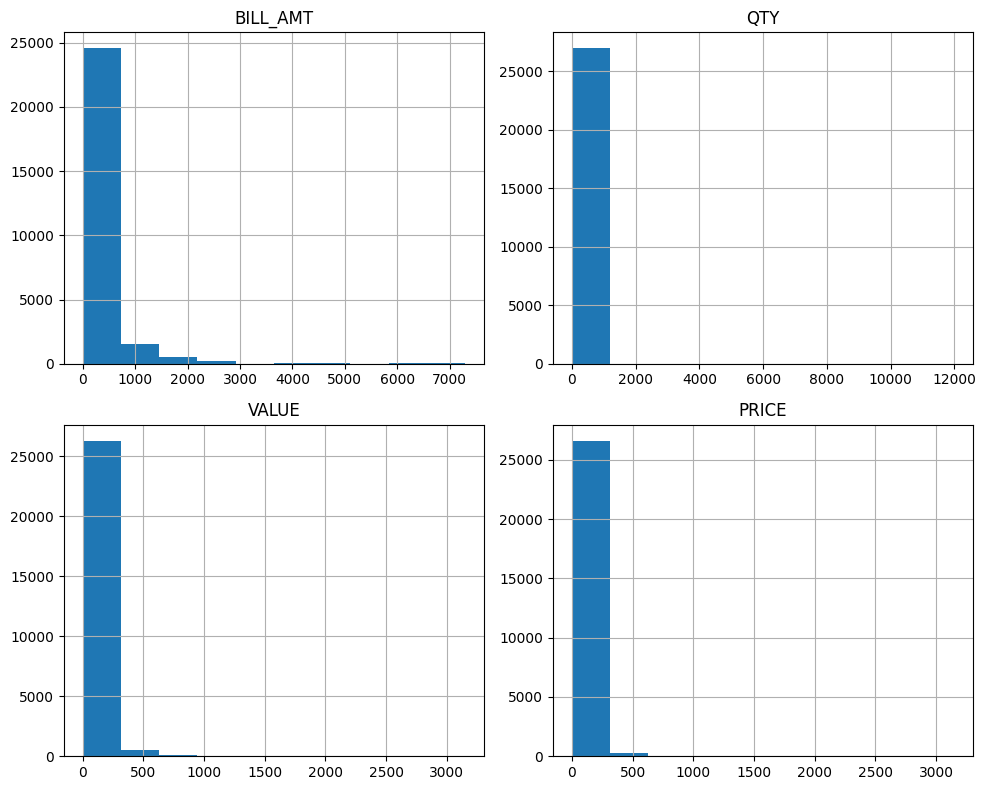

In [25]:
working = pd.read_csv("/content/Hackathon_Working_Data.csv")
numeric_cols = ['BILL_AMT','QTY','VALUE','PRICE']
working[numeric_cols].hist(figsize=(10,8))
plt.tight_layout()
plt.show()

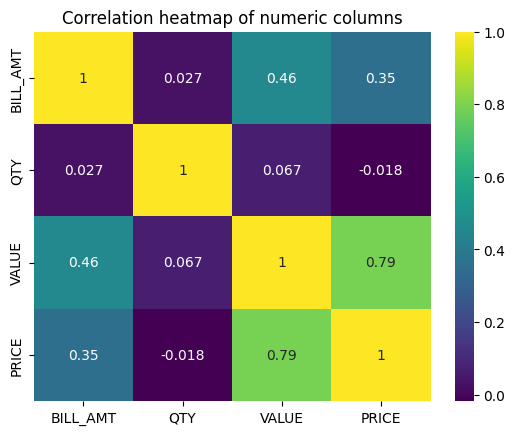

In [26]:
sns.heatmap(working[numeric_cols].corr(),annot=True, cmap='viridis')
plt.title("Correlation heatmap of numeric columns")
plt.show()

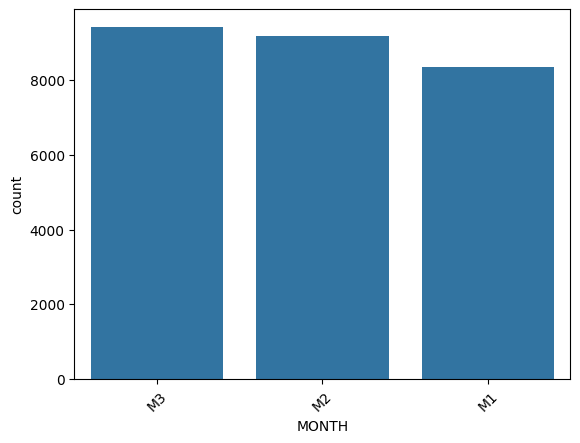

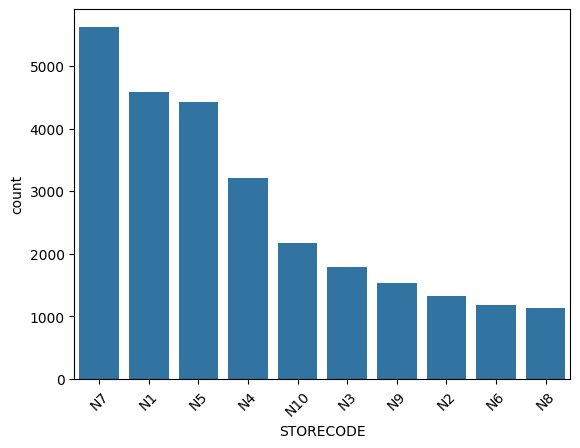

In [27]:
categorical_cols = ['MONTH','STORECODE']
for col in categorical_cols:
  sns.countplot(data=working,x=col,order=working[col].value_counts().index)
  plt.xticks(rotation=45)
  plt.show()

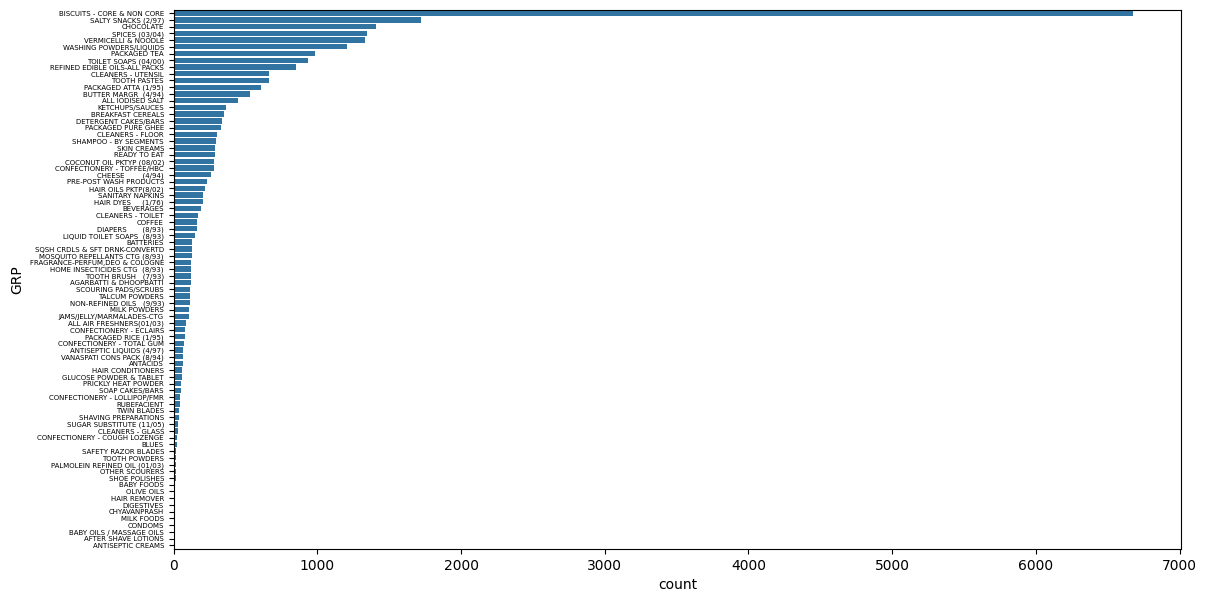

In [28]:
plt.figure(figsize=(13,7))
categorical_cols = ['GRP']
for col in categorical_cols:
  sns.countplot(data=working,y=col,order=working[col].value_counts().index)
  plt.yticks(fontsize=5)
  plt.show()

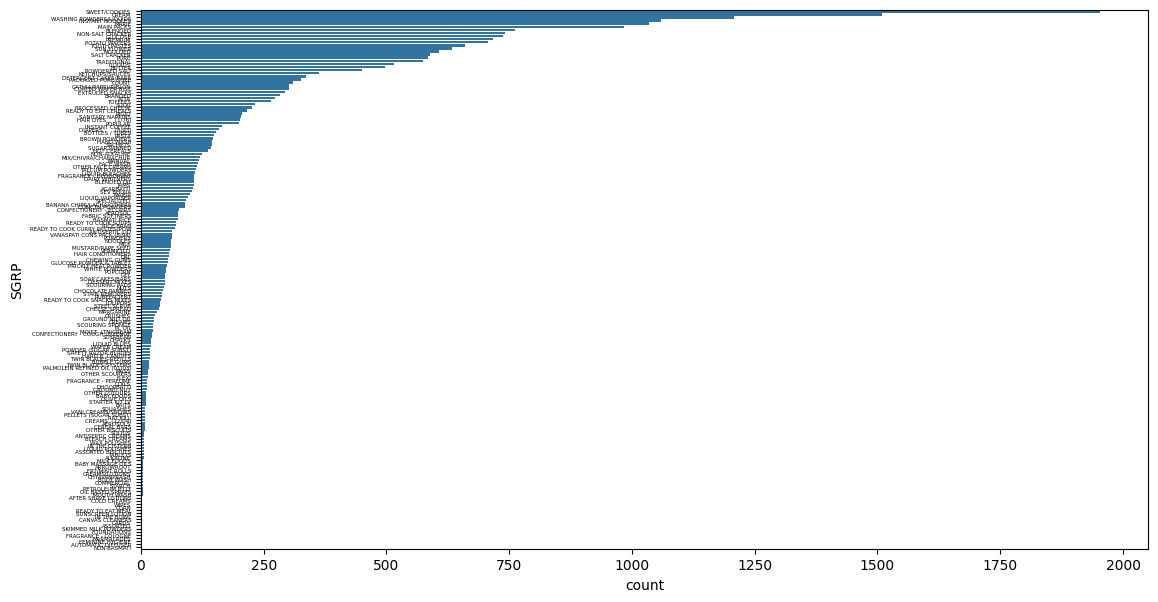

In [31]:
plt.figure(figsize=(13,7))
categorical_cols = ['SGRP']
for col in categorical_cols:
  sns.countplot(data=working,y=col,order=working[col].value_counts().index)
  plt.yticks(fontsize=4)
  plt.show()

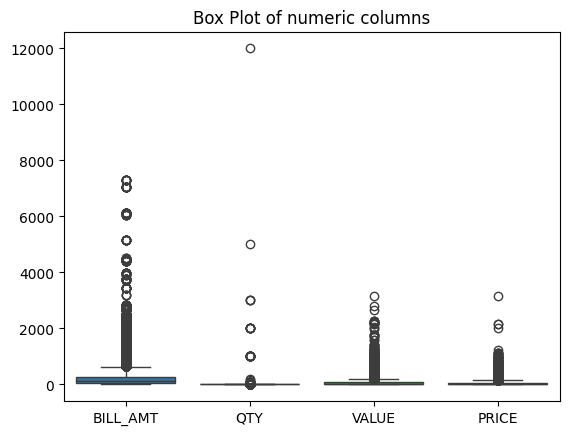

In [29]:
sns.boxplot(data=working[numeric_cols])
plt.title("Box Plot of numeric columns")
plt.show()

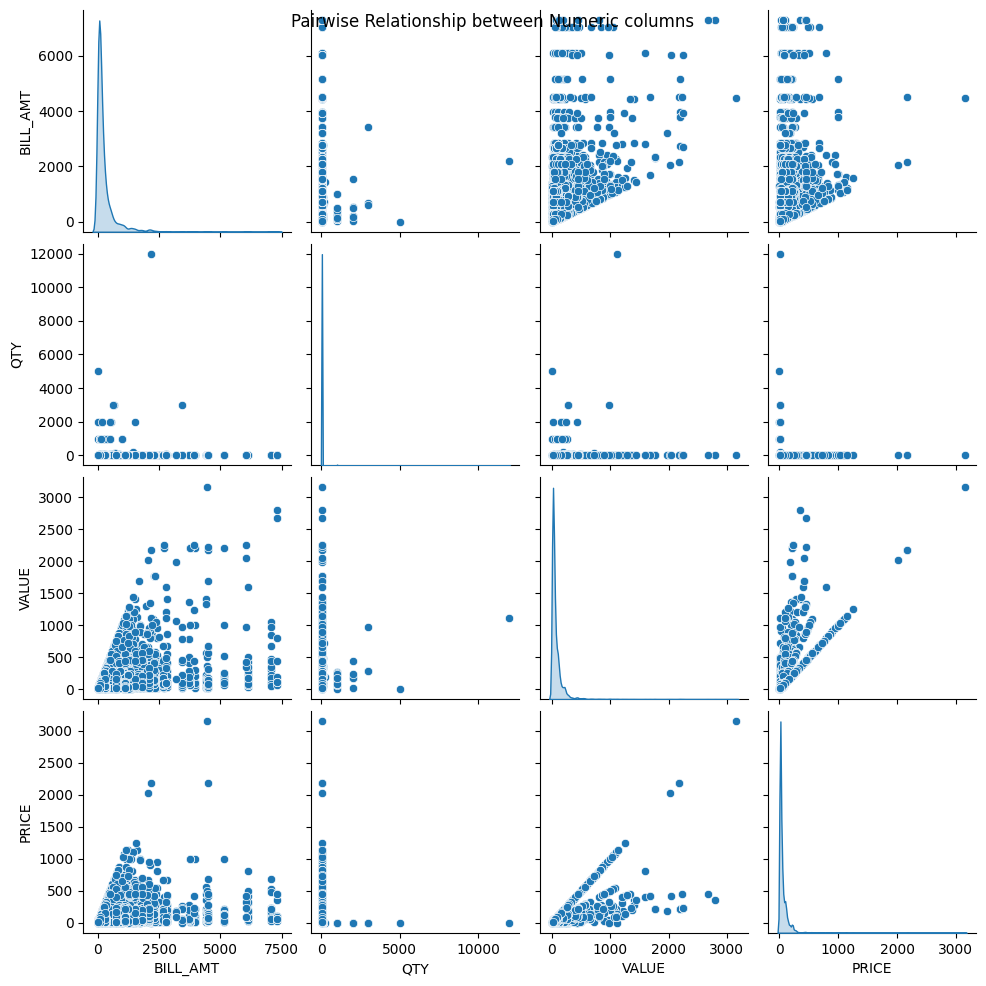

In [30]:
sns.pairplot(working[numeric_cols],diag_kind='kde')
plt.suptitle("Pairwise Relationship between Numeric columns")
plt.show()

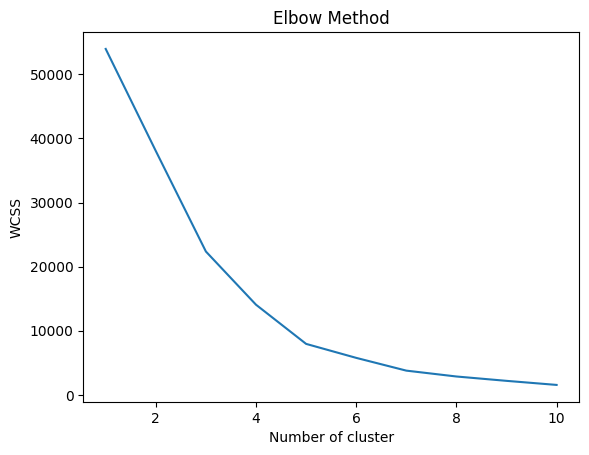

In [32]:
from sklearn.cluster import KMeans

x = working[['BILL_AMT','QTY']]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

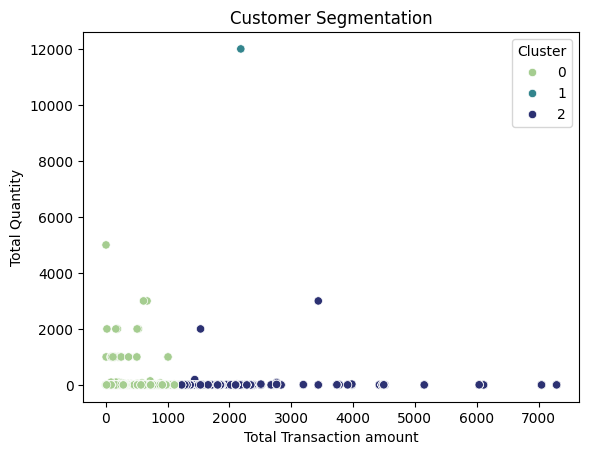

In [34]:
#based on elbow method, choose the optimal number of clusters

n_clusters=3

kmeans = KMeans(n_clusters, init='k-means++',random_state=42)
working['Cluster']=kmeans.fit_predict(x_scaled)

sns.scatterplot(data=working, x='BILL_AMT',y='QTY',hue='Cluster',palette='crest')
plt.title("Customer Segmentation")
plt.xlabel('Total Transaction amount')
plt.ylabel('Total Quantity')
plt.legend(title='Cluster')
plt.show()

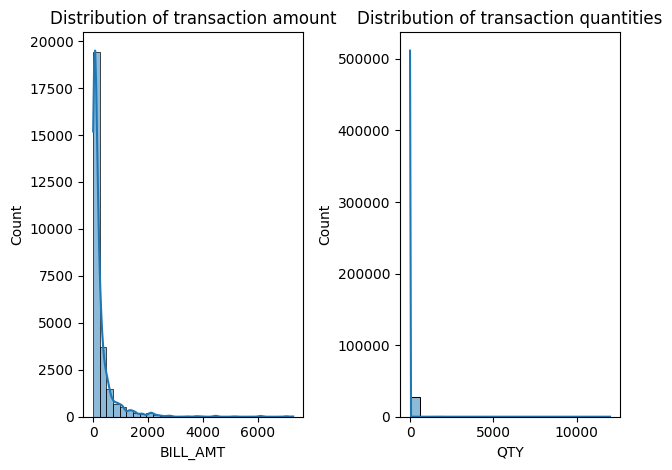

In [35]:
plt.subplot(1,2,1)
sns.histplot(working['BILL_AMT'],bins=30,kde=True)
plt.title("Distribution of transaction amount")

plt.subplot(1,2,2)
sns.histplot(working['QTY'],bins=20,kde=True)
plt.title("Distribution of transaction quantities")
plt.tight_layout()
plt.show()

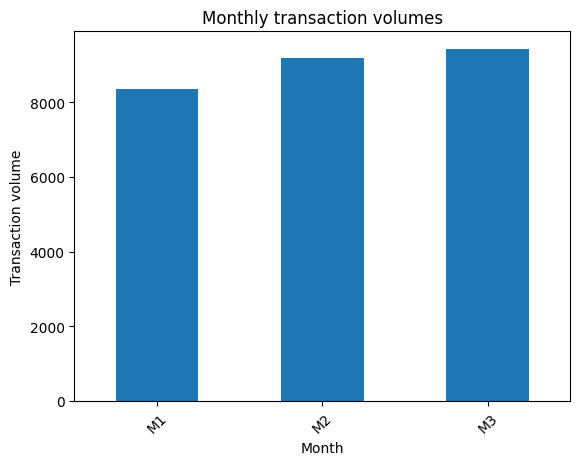

In [36]:
monthly_sales = working.groupby('MONTH').size()
monthly_sales.plot(kind='bar')
plt.title("Monthly transaction volumes")
plt.xlabel('Month')
plt.ylabel('Transaction volume')
plt.xticks(rotation=45)
plt.show()

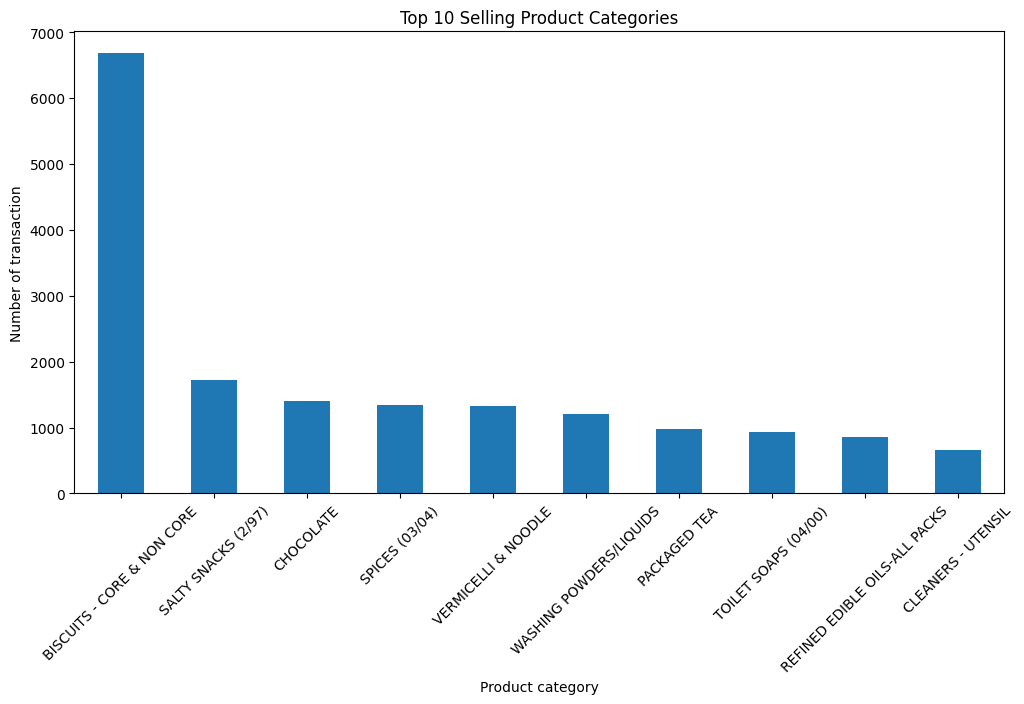

In [37]:
top_categories = working['GRP'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
top_categories.plot(kind='bar')
plt.title("Top 10 Selling Product Categories")
plt.xlabel('Product category')
plt.ylabel('Number of transaction')
plt.xticks(rotation=45)
plt.show()

In [38]:
#conduct RFM analysis or clustring techniques
rfm_working = working.groupby('STORECODE').agg({
    'BILL_ID':'count',    #Frequency
    'BILL_AMT':'sum',     #Monetary
}).rename(columns={'BILL_ID':'Frequency','BILL_AMT':'Monetary'})

In [39]:
rfm_working

,Frequency,Monetary
STORECODE,,
N1,4583,626464.78
N10,2169,550107.00
N2,1331,794062.00
N3,1793,494536.37
N4,3212,872215.70
N5,4431,695755.00
N6,1185,366530.00
N7,5625,1036821.74
N8,1128,492817.35


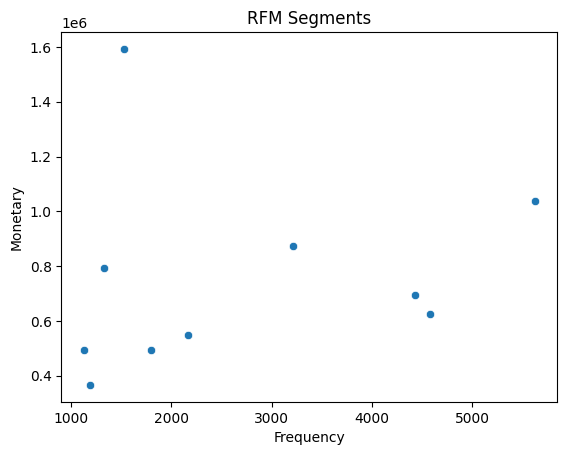

In [40]:
sns.scatterplot(data=rfm_working, x='Frequency',y='Monetary',palette='flare')
plt.title("RFM Segments")
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

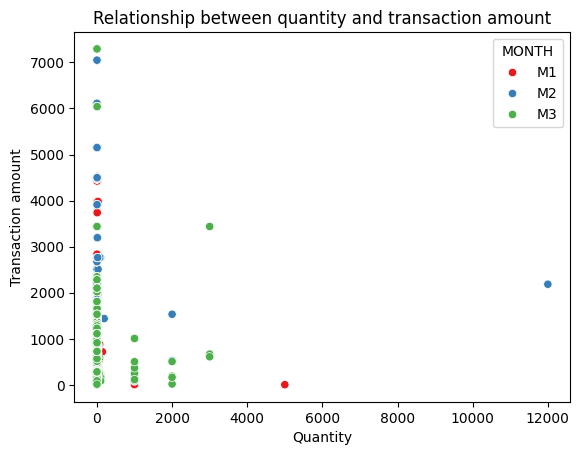

In [41]:
sns.scatterplot(data=working, x='QTY',y='BILL_AMT',hue='MONTH',palette='Set1')
plt.title("Relationship between quantity and transaction amount")
plt.xlabel('Quantity')
plt.ylabel('Transaction amount')
plt.show()

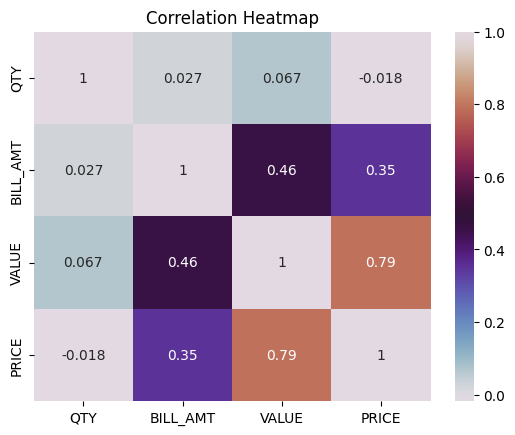

In [43]:
sns.heatmap(working[['QTY','BILL_AMT','VALUE','PRICE']].corr(),annot=True,cmap='twilight')
plt.title("Correlation Heatmap")
plt.show()

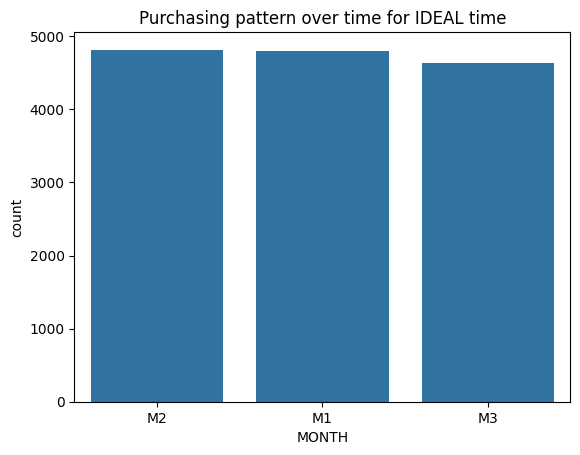

In [44]:
#customer behaviour analysis
#for ideal data

sns.countplot(data=ideal, x='MONTH', order=ideal['MONTH'].value_counts().index)
plt.title("Purchasing pattern over time for IDEAL time")
plt.show()

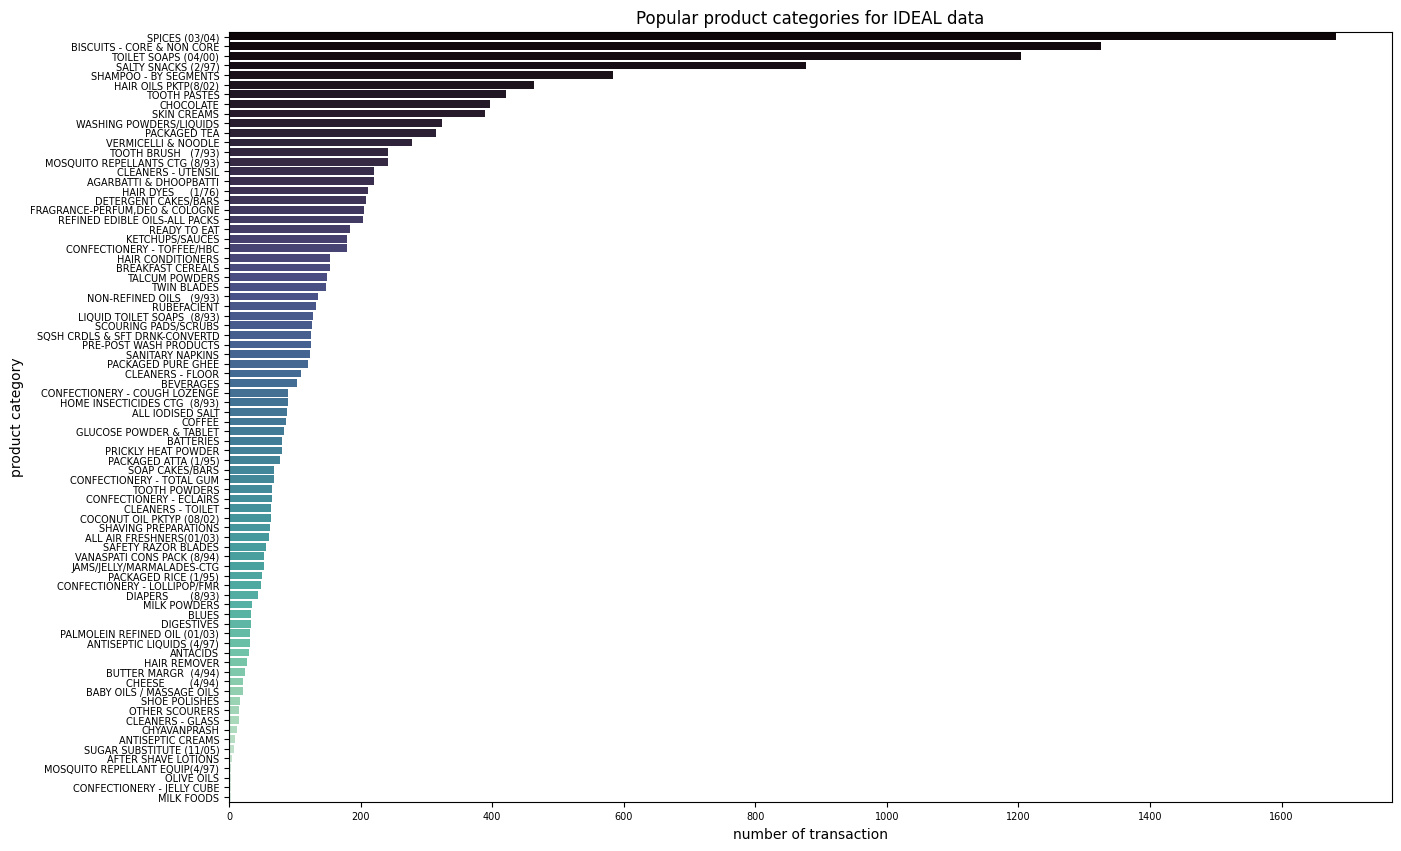

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(data=ideal,y='GRP', order=ideal['GRP'].value_counts().index, palette='mako')
plt.title("Popular product categories for IDEAL data")
plt.xlabel('number of transaction')
plt.ylabel('product category')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

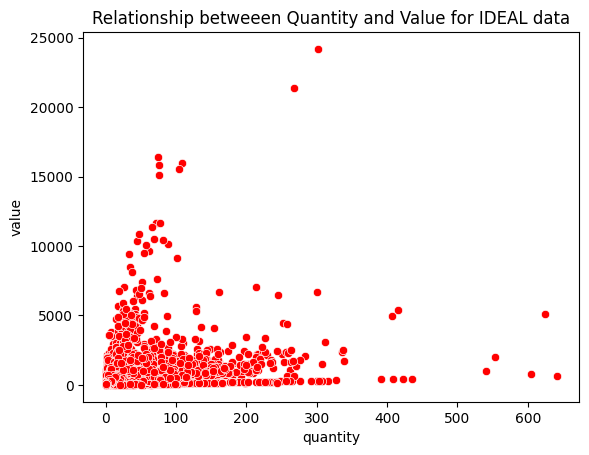

In [47]:
sns.scatterplot(data=ideal,x='QTY', y='VALUE',color='red')
plt.title("Relationship betweeen Quantity and Value for IDEAL data")
plt.xlabel('quantity')
plt.ylabel('value')
plt.show()

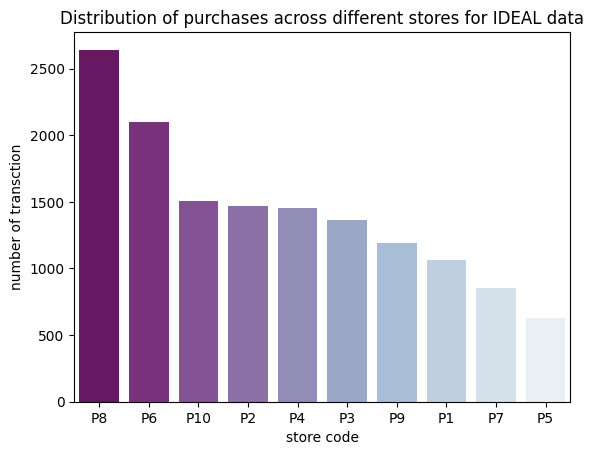

In [50]:
sns.countplot(data=ideal, x='STORECODE', order=ideal['STORECODE'].value_counts().index, palette='BuPu_r')
plt.title("Distribution of purchases across different stores for IDEAL data")
plt.xlabel('store code')
plt.ylabel('number of transction')
plt.show()

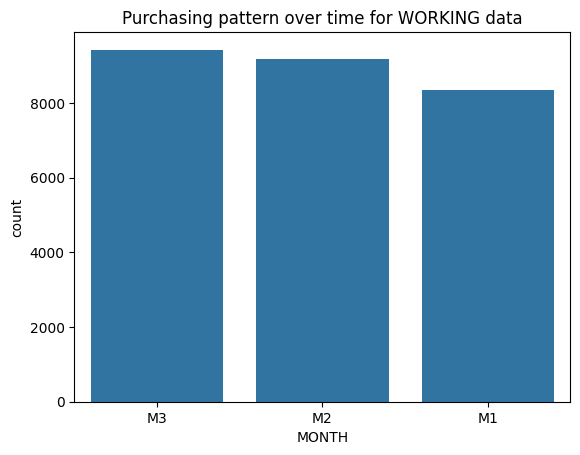

In [51]:
#for working data

sns.countplot(data=working, x='MONTH', order=working['MONTH'].value_counts().index)
plt.title("Purchasing pattern over time for WORKING data")
plt.show()

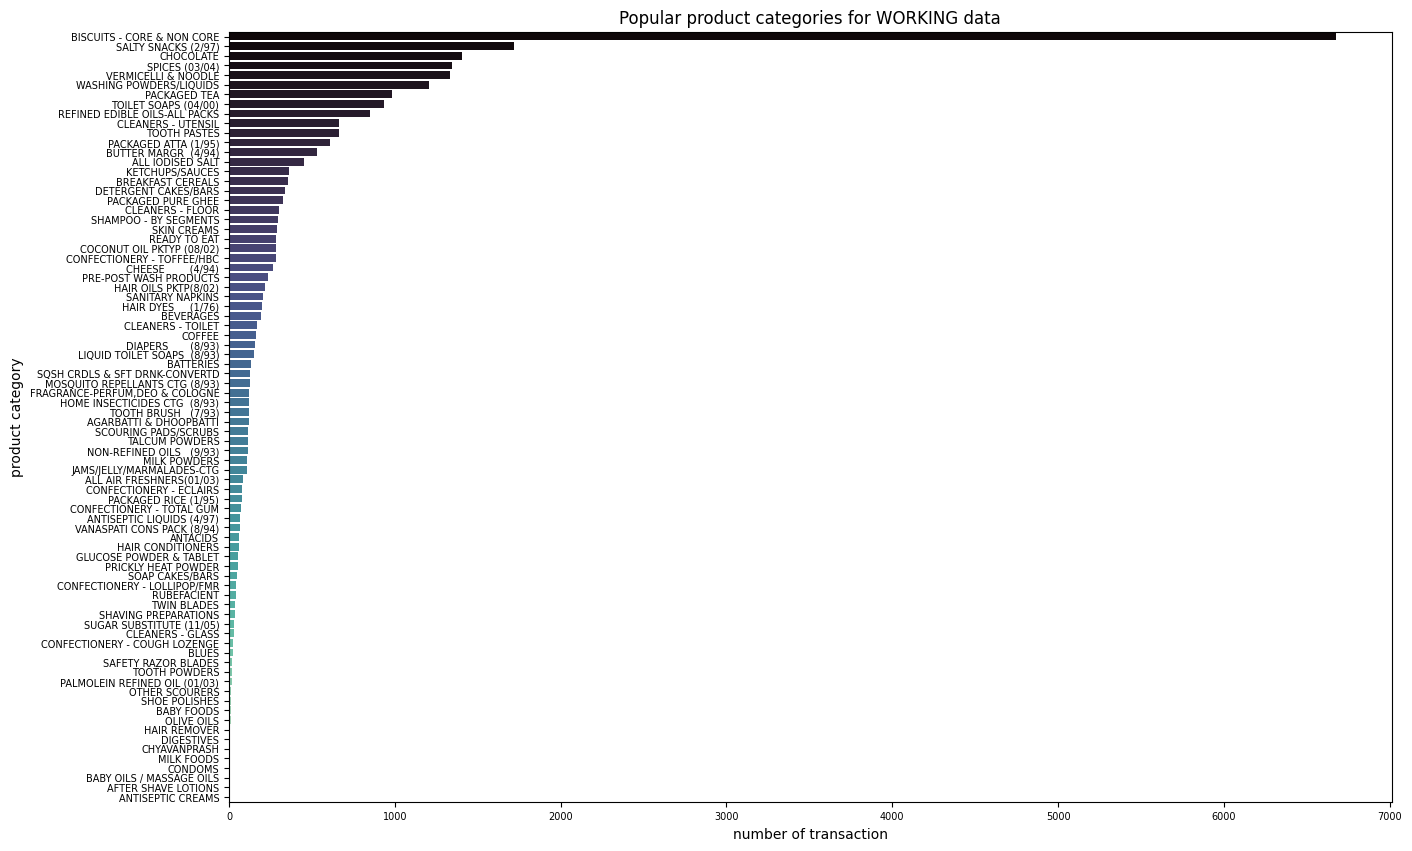

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(data=working,y='GRP', order=working['GRP'].value_counts().index, palette='mako')
plt.title("Popular product categories for WORKING data")
plt.xlabel('number of transaction')
plt.ylabel('product category')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

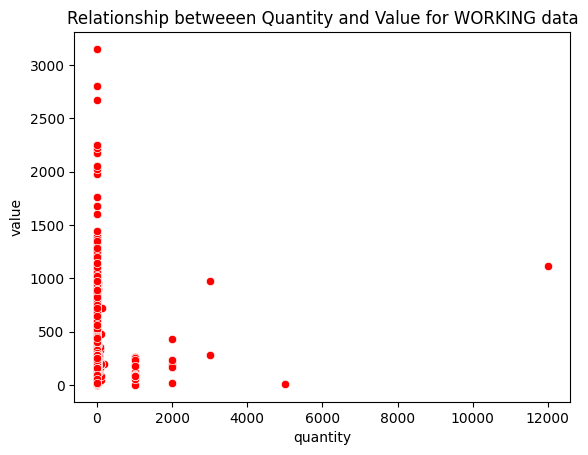

In [53]:
sns.scatterplot(data=working,x='QTY', y='VALUE',color='red')
plt.title("Relationship betweeen Quantity and Value for WORKING data")
plt.xlabel('quantity')
plt.ylabel('value')
plt.show()

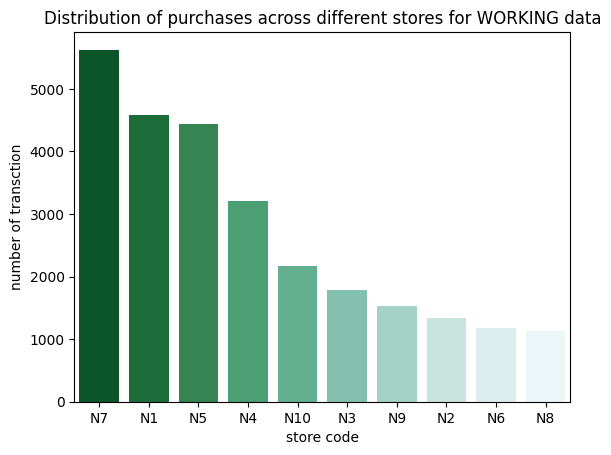

In [54]:
sns.countplot(data=working, x='STORECODE', order=working['STORECODE'].value_counts().index, palette='BuGn_r')
plt.title("Distribution of purchases across different stores for WORKING data")
plt.xlabel('store code')
plt.ylabel('number of transction')
plt.show()

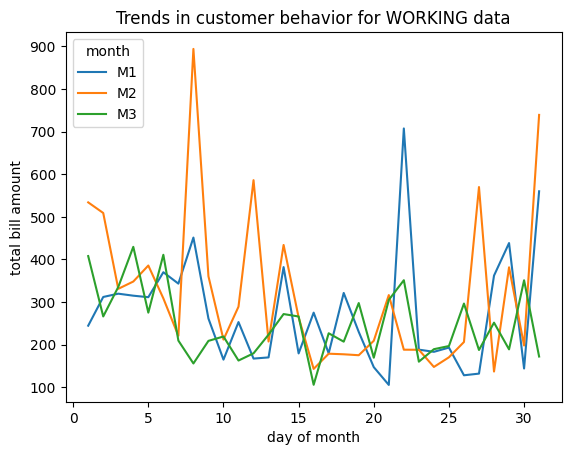

In [55]:
sns.lineplot(data=working, x='DAY', y='BILL_AMT', hue='MONTH',ci=None)
plt.title("Trends in customer behavior for WORKING data")
plt.xlabel('day of month')
plt.ylabel('total bill amount')
plt.legend(title='month')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

x=working_scaled.drop(columns=['PRICE'])
y=working_scaled['PRICE']

x_train,x_val_test,y_train,y_val_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_val_test,y_val_test,test_size=0.5,random_state=42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU

gru_model=Sequential([
    GRU(units=64,input_shape=(x_train.shape[1],1)),
    Dense(units=1)
])

gru_model.compile(optimizer='adam',loss='mean_squared_error')

In [58]:
gru_history=gru_model.fit(x_train.values.reshape((x_train.shape[0],x_train.shape[1],1)),
                          y_train.values,epochs=200,batch_size=32,validation_data=(x_val.values.reshape((x_val.shape[0],x_val.shape[1],1)),y_val.values))

test_loss=gru_model.evaluate(x_test.values.reshape((x_test.shape[0],x_test.shape[1],1)),y_test.values)
print("gru model test loss:",test_loss)

Epoch 1/200
591/591 [==============================] - 5s 8ms/step - loss: 0.2138 - val_loss: 0.1776
Epoch 2/200
591/591 [==============================] - 3s 5ms/step - loss: 0.1923 - val_loss: 0.1745
Epoch 3/200
591/591 [==============================] - 3s 5ms/step - loss: 0.1804 - val_loss: 0.1337
Epoch 4/200
591/591 [==============================] - 3s 4ms/step - loss: 0.1633 - val_loss: 0.1384
Epoch 5/200
591/591 [==============================] - 3s 5ms/step - loss: 0.1453 - val_loss: 0.0943
Epoch 6/200
591/591 [==============================] - 3s 6ms/step - loss: 0.1245 - val_loss: 0.0736
Epoch 7/200
591/591 [==============================] - 3s 4ms/step - loss: 0.1081 - val_loss: 0.0669
Epoch 8/200
591/591 [==============================] - 3s 4ms/step - loss: 0.0940 - val_loss: 0.0454
Epoch 9/200
591/591 [==============================] - 3s 4ms/step - loss: 0.0758 - val_loss: 0.0390
Epoch 10/200
591/591 [==============================] - 4s 6ms/step - loss: 0.0671 - val_lo

In [59]:
y_pred = gru_model.predict(x_test)
y_true = y_test

127/127 [==============================] - 1s 3ms/step


In [60]:
validation.head()

,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS


In [61]:
y_pred_filtered=y_pred[:len(validation['ID'])]

y_pred_int=np.round(y_pred_filtered).astype(int)
y_pred_int[y_pred_int<0]=0

submission_data = pd.DataFrame({'ID':validation['ID'],'TOTAL_VALUE':y_pred_int.flatten()})



In [63]:
submission_data.head()

,ID,TOTAL_VALUE
0,1112535,0
1,1112539,0
2,1112543,0
3,1112547,0
4,1112551,0


In [65]:
submission_data.to_csv("submission.csv",index=False)
print("DONE")

DONE
